<a href="https://colab.research.google.com/github/pasindu-94/solar-power-prediction-multi-inverter/blob/main/solar_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solar Power Prediction and Forecasting Analysis

## Background

Solar power forecasting is the process of gathering and analyzing data in order to predict solar power generation on various time horizons with the goal to mitigate the impact of solar intermittency. Solar power forecasts are used for efficient management of the electric grid and for power trading

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

##Loading Datasets

In [52]:
solar_plant01_generation_file = 'https://raw.githubusercontent.com/pasindu-94/solar-power-prediction-multi-inverter/main/datasets/solar_plant01_generation_data.csv'
solar_plant01_weather_data_file = 'https://raw.githubusercontent.com/pasindu-94/solar-power-prediction-multi-inverter/main/datasets/solar_plant01_weather_data.csv'
solar_plant02_generation_file = 'https://raw.githubusercontent.com/pasindu-94/solar-power-prediction-multi-inverter/main/datasets/solar_plant02_generation_data.csv'
solar_plant02_weather_data_file = 'https://raw.githubusercontent.com/pasindu-94/solar-power-prediction-multi-inverter/main/datasets/solar_plant02_weather_data.csv'


# Load CSV File
solargen_data01 = pd.read_csv(solar_plant01_generation_file)
weather_data01 = pd.read_csv(solar_plant01_weather_data_file)

solargen_data02 = pd.read_csv(solar_plant02_generation_file)
weather_data02 = pd.read_csv(solar_plant02_weather_data_file)

In [3]:
solargen_data01.head()

DATE_TIME  PLANT_ID  ... DAILY_YIELD  TOTAL_YIELD
0  15-05-2020 00:00   4135001  ...         0.0    6259559.0
1  15-05-2020 00:00   4135001  ...         0.0    6183645.0
2  15-05-2020 00:00   4135001  ...         0.0    6987759.0
3  15-05-2020 00:00   4135001  ...         0.0    7602960.0
4  15-05-2020 00:00   4135001  ...         0.0    7158964.0

[5 rows x 7 columns]

In [4]:
weather_data01.head()

DATE_TIME  PLANT_ID  ... MODULE_TEMPERATURE  IRRADIATION
0  2020-05-15 00:00:00   4135001  ...          22.857507          0.0
1  2020-05-15 00:15:00   4135001  ...          22.761668          0.0
2  2020-05-15 00:30:00   4135001  ...          22.592306          0.0
3  2020-05-15 00:45:00   4135001  ...          22.360852          0.0
4  2020-05-15 01:00:00   4135001  ...          22.165423          0.0

[5 rows x 6 columns]

In [ ]:
solargen_data02.head()

DATE_TIME  PLANT_ID  ...  DAILY_YIELD   TOTAL_YIELD
0  2020-05-15 00:00:00   4136001  ...  9425.000000  2.429011e+06
1  2020-05-15 00:00:00   4136001  ...     0.000000  1.215279e+09
2  2020-05-15 00:00:00   4136001  ...  3075.333333  2.247720e+09
3  2020-05-15 00:00:00   4136001  ...   269.933333  1.704250e+06
4  2020-05-15 00:00:00   4136001  ...  3177.000000  1.994153e+07

[5 rows x 7 columns]

In [ ]:
weather_data02.head()

DATE_TIME  PLANT_ID  ... MODULE_TEMPERATURE  IRRADIATION
0  2020-05-15 00:00:00   4136001  ...          25.060789          0.0
1  2020-05-15 00:15:00   4136001  ...          24.421869          0.0
2  2020-05-15 00:30:00   4136001  ...          24.427290          0.0
3  2020-05-15 00:45:00   4136001  ...          24.420678          0.0
4  2020-05-15 01:00:00   4136001  ...          25.088210          0.0

[5 rows x 6 columns]

##Data Set Preprocessing & Analysis

###Solar Plant 01 Generation Data

####Explore Dataset

In [5]:
solargen_data01.shape

(68778, 7)

In [6]:
solargen_data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
solargen_data01.describe(include='all').transpose()

count unique  ...          75%          max
DATE_TIME    68778   3158  ...          NaN          NaN
PLANT_ID     68778    NaN  ...    4.135e+06    4.135e+06
SOURCE_KEY   68778     22  ...          NaN          NaN
DC_POWER     68778    NaN  ...      6366.96      14471.1
AC_POWER     68778    NaN  ...      623.619      1410.95
DAILY_YIELD  68778    NaN  ...         6274         9163
TOTAL_YIELD  68778    NaN  ...  7.26871e+06  7.84682e+06

[7 rows x 11 columns]

####Checking for Null Records

In [12]:
solargen_data01.isnull().sum()

DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
DATE           0
TIME           0
dtype: int64

####Dropping Unnecessary Columns

In [53]:
solargen_data01.drop(labels='PLANT_ID', axis=1, inplace=True)

####Formatting Data Time

In [54]:
#Formatting DateTime
solargen_data01['DATE_TIME']= pd.to_datetime(solargen_data01['DATE_TIME'],format='%d-%m-%Y %H:%M')
#solargen_data01['DATE_TIME'] = pd.to_datetime(solargen_data01['DATE_TIME'])
solargen_data01.sample(5)

DATE_TIME       SOURCE_KEY  ...  DAILY_YIELD  TOTAL_YIELD
15399 2020-05-23 02:30:00  ZoEaEvLYb1n2sOq  ...     0.000000  7153713.000
1332  2020-05-15 15:15:00  adLQvlD726eNBSB  ...  5385.428571  6276740.429
44378 2020-06-06 09:30:00  McdE0feGgRqW7Ca  ...  1356.428571  7326037.429
50063 2020-06-09 02:45:00  YxYtjZvoooNbGkE  ...     0.000000  7365310.000
20128 2020-05-25 10:30:00  sjndEbLyjtCKgGv  ...  2417.375000  7091768.375

[5 rows x 6 columns]

In [58]:
solargen_data01['DATE'] = solargen_data01['DATE_TIME'].apply(lambda x:x.date())
solargen_data01['TIME'] = solargen_data01['DATE_TIME'].apply(lambda x:x.time())

solargen_data01.sample(5)

DATE_TIME       SOURCE_KEY  ...        DATE      TIME
27074 2020-05-28 18:45:00  1BY6WEcLGh8j5v7  ...  2020-05-28  18:45:00
14303 2020-05-22 13:00:00  uHbuxQJl8lW7ozc  ...  2020-05-22  13:00:00
22405 2020-05-26 12:30:00  VHMLBKoKgIrUVDU  ...  2020-05-26  12:30:00
40304 2020-06-04 10:00:00  wCURE6d3bPkepu2  ...  2020-06-04  10:00:00
25930 2020-05-28 05:45:00  1BY6WEcLGh8j5v7  ...  2020-05-28  05:45:00

[5 rows x 8 columns]

####Replacing Source Key with Simple ID

In [59]:
solar01_inverter_id = solargen_data01['SOURCE_KEY'].unique()
solargen_data01['SOURCE_KEY'] = solargen_data01['SOURCE_KEY'].apply(lambda x :  int(np.where(solar01_inverter_id == x)[0]))

In [60]:
solargen_data01.sample(5)

DATE_TIME  SOURCE_KEY  ...        DATE      TIME
65560 2020-06-16 10:45:00          15  ...  2020-06-16  10:45:00
30055 2020-05-30 13:00:00          16  ...  2020-05-30  13:00:00
26771 2020-05-28 15:15:00           5  ...  2020-05-28  15:15:00
26980 2020-05-28 17:30:00          15  ...  2020-05-28  17:30:00
10823 2020-05-20 08:00:00          16  ...  2020-05-20  08:00:00

[5 rows x 8 columns]

####Plant 01 DC Power Analysis

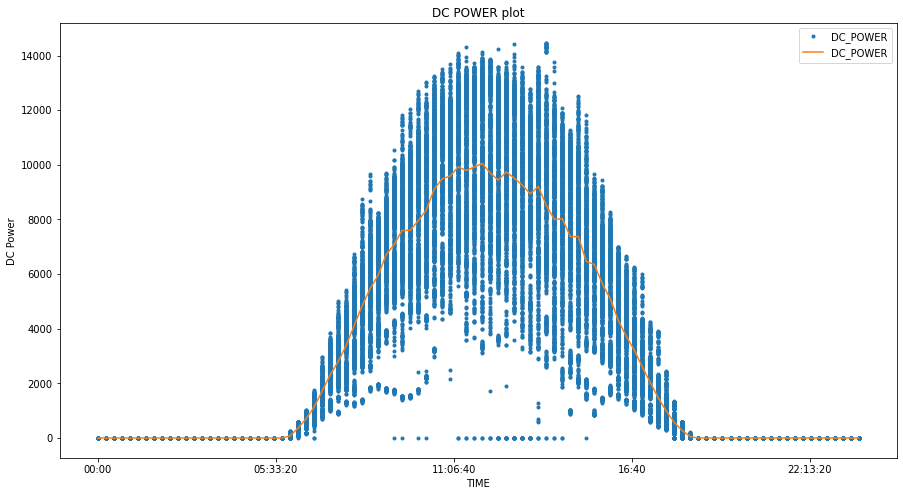

In [61]:
solargen_data01.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8))
solargen_data01.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True)
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

####Plant 01 AC Power Analysis

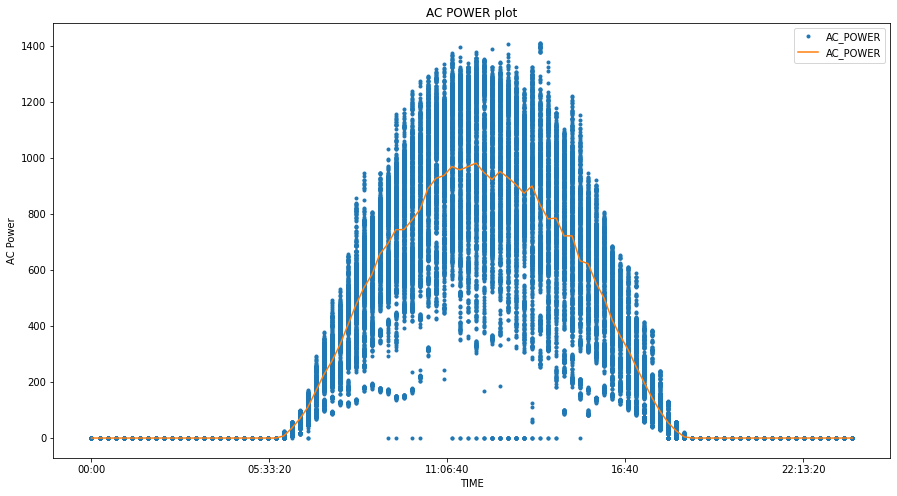

In [62]:
solargen_data01.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 8))
solargen_data01.groupby('TIME')['AC_POWER'].agg('mean').plot(legend=True)
plt.ylabel('AC Power')
plt.title('AC POWER plot')
plt.show()

####Observations

Plant 01 Inverters Produces Power from 5:30 to 18:30 since the sunlights is availablle only during that time period



####Daily Yeild Variation

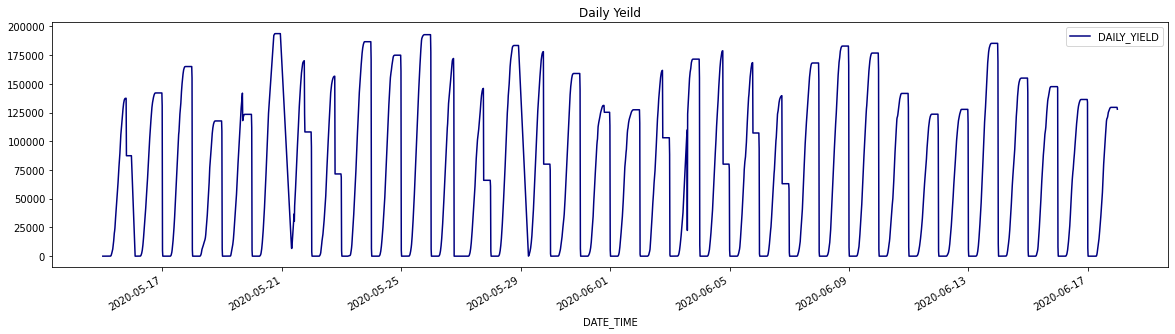

In [63]:
solargen_data01_eval=solargen_data01.groupby('DATE_TIME').sum().reset_index()

# daily yield plot
solargen_data01_eval.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy', title = 'Daily Yeild', figsize = (20,5))

plt.show()

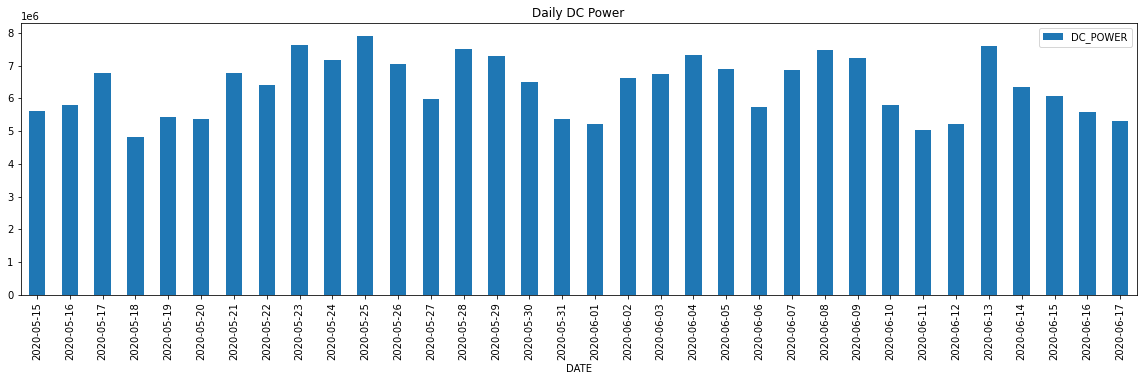

In [74]:
daily_solar01_gen = solargen_data01.groupby('DATE')['DC_POWER'].agg('sum')
daily_solar01_gen.plot.bar(figsize=(20,5), legend=True)
plt.title('Daily DC Power')
plt.show()

####Evaluation of Daily Power Generations

In [64]:
solargen_data01_calandar = solargen_data01.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

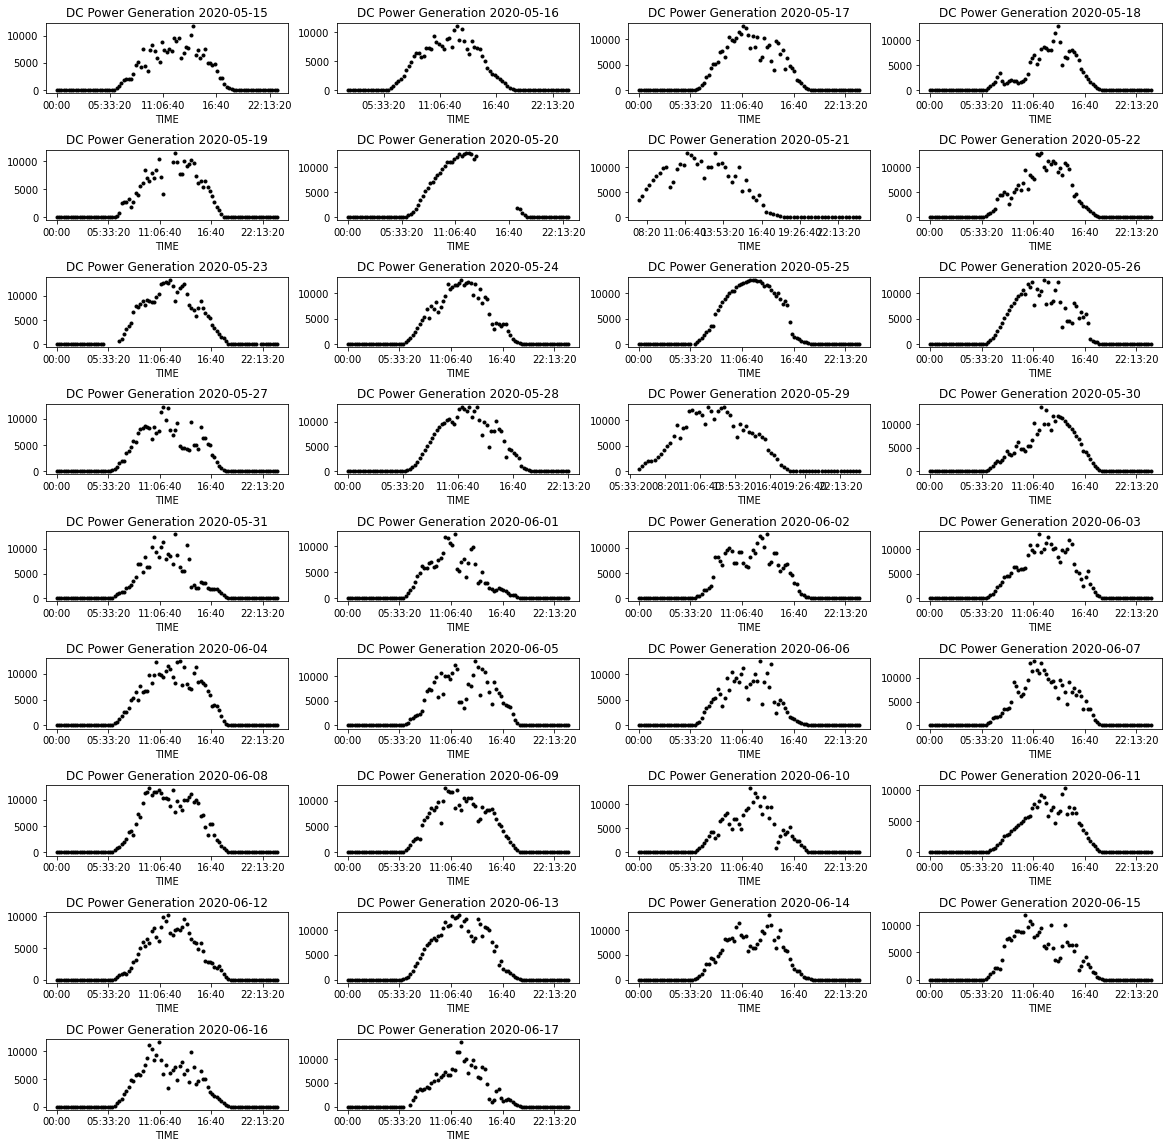

In [72]:
cols = solargen_data01_calandar.columns 
gp = plt.figure(figsize=(20,20)) 
    
gp.subplots_adjust(wspace=0.2, hspace=0.8)
for i in range(1, len(cols)+1):
  ax = gp.add_subplot(9,4, i)
  solargen_data01_calandar[cols[i-1]].plot(ax=ax, style = 'k.')
  ax.set_title('{} {}'.format('DC Power Generation', cols[i-1]))

####Observation

All the curves show a simmilar variation despite some fluctuations between 11AM to 2 PM


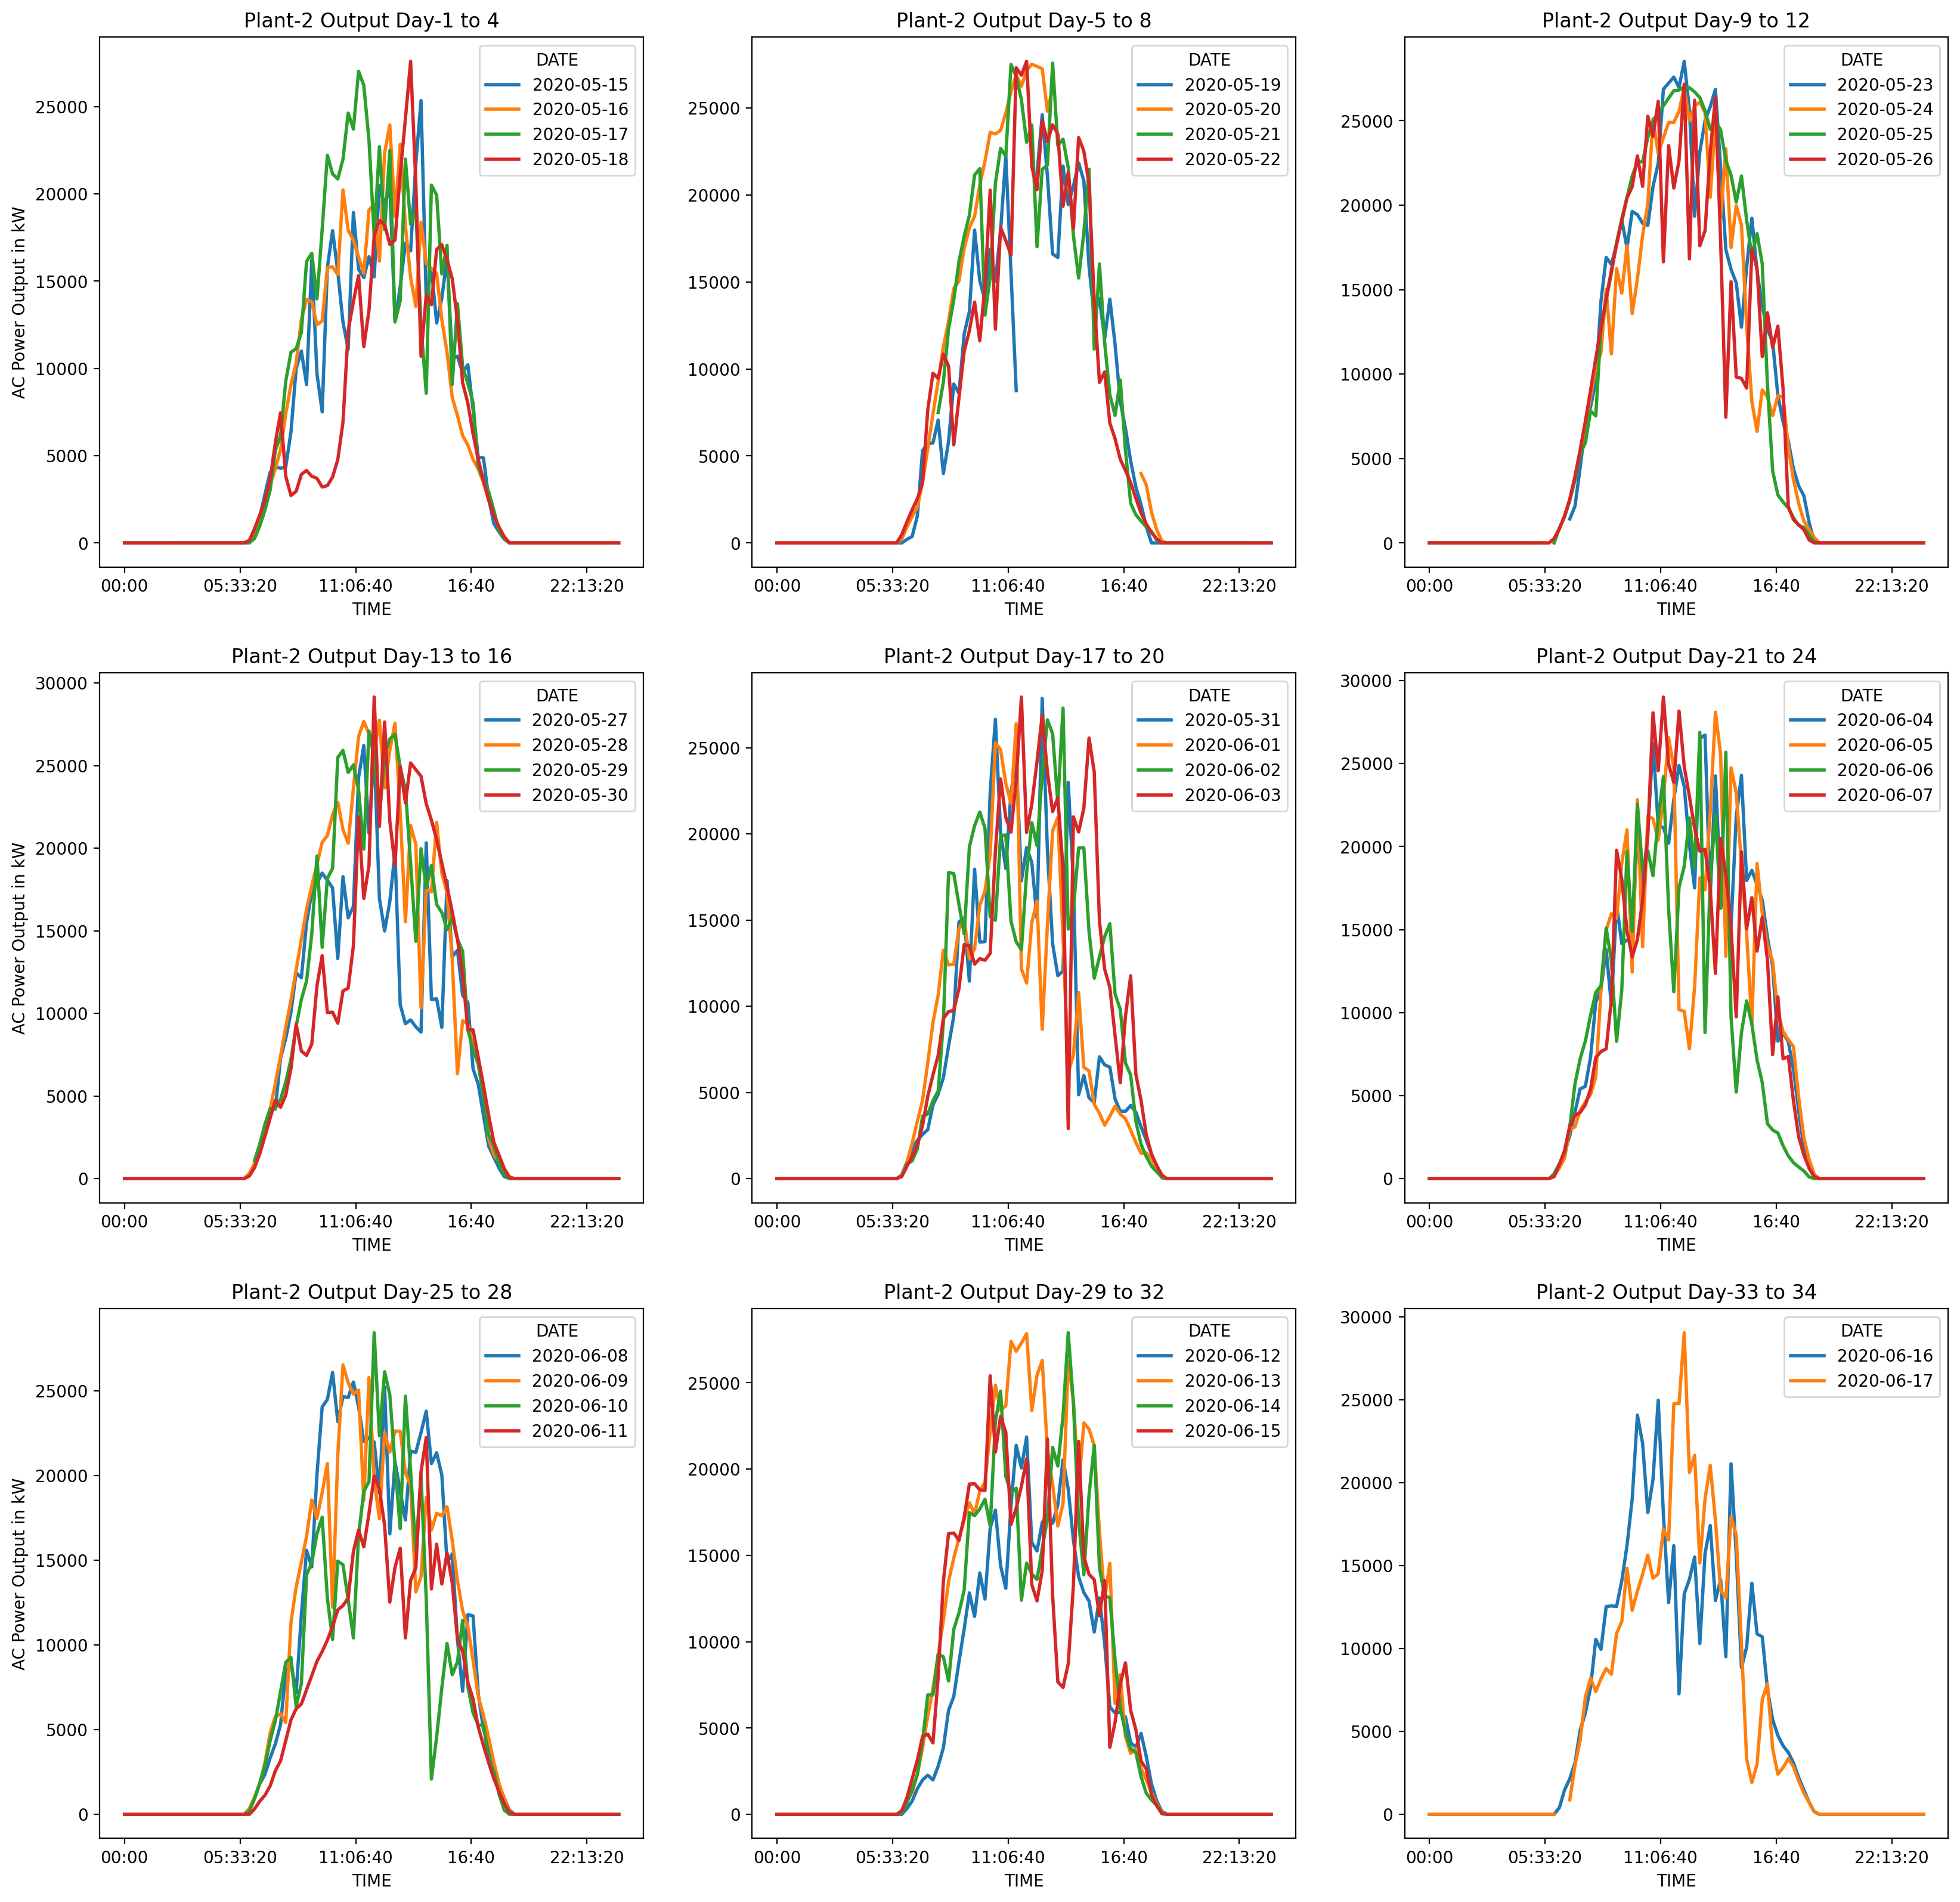

In [114]:
solargen_data01_ac_pwr = solargen_data01.copy()
solargen_data01_ac_pwr = solargen_data01_ac_pwr.groupby(['TIME','DATE'])['AC_POWER'].sum().unstack()

fig,ax=plt.subplots(ncols=3,nrows=3,dpi=200,figsize=(20,20))
ax[0,0].set_title('Plant-2 Output Day-1 to 4')
ax[0,1].set_title('Plant-2 Output Day-5 to 8')
ax[0,2].set_title('Plant-2 Output Day-9 to 12')
ax[1,0].set_title('Plant-2 Output Day-13 to 16')
ax[1,1].set_title('Plant-2 Output Day-17 to 20')
ax[1,2].set_title('Plant-2 Output Day-21 to 24')
ax[2,0].set_title('Plant-2 Output Day-25 to 28')
ax[2,1].set_title('Plant-2 Output Day-29 to 32')
ax[2,2].set_title('Plant-2 Output Day-33 to 34')

ax[0,0].set_ylabel('AC Power Output in kW')
ax[1,0].set_ylabel('AC Power Output in kW')
ax[2,0].set_ylabel('AC Power Output in kW')
    
solargen_data01_ac_pwr.iloc[:,0:4].plot(ax=ax[0,0], linewidth = 2)
solargen_data01_ac_pwr.iloc[:,4:8].plot(ax=ax[0,1], linewidth = 2)
solargen_data01_ac_pwr.iloc[:,8:12].plot(ax=ax[0,2], linewidth = 2)
solargen_data01_ac_pwr.iloc[:,12:16].plot(ax=ax[1,0], linewidth = 2)
solargen_data01_ac_pwr.iloc[:,16:20].plot(ax=ax[1,1], linewidth = 2)
solargen_data01_ac_pwr.iloc[:,20:24].plot(ax=ax[1,2], linewidth = 2)
solargen_data01_ac_pwr.iloc[:,24:28].plot(ax=ax[2,0], linewidth = 2)
solargen_data01_ac_pwr.iloc[:,28:32].plot(ax=ax[2,1], linewidth = 2)
solargen_data01_ac_pwr.iloc[:,32:].plot(ax=ax[2,2], linewidth = 2)

###Solar Plant 01 Weather Data

####Explore Dataset

In [ ]:
weather_data01.shape

(3182, 6)

In [16]:
weather_data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [77]:
weather_data01.describe(include='all').transpose()

count unique  ...       75%      max
DATE_TIME            3182   3182  ...       NaN      NaN
SOURCE_KEY           3182      1  ...       NaN      NaN
AMBIENT_TEMPERATURE  3182    NaN  ...   27.9205  35.2525
MODULE_TEMPERATURE   3182    NaN  ...   41.3078  65.5457
IRRADIATION          3182    NaN  ...  0.449588  1.22165

[5 rows x 11 columns]

####Checking for Null Records

In [ ]:
weather_data01.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

####Dropping Unnecessary Columns

In [75]:
weather_data01.drop(labels='PLANT_ID', axis=1, inplace=True)

####Formatting Data Time

In [78]:
#Formatting DateTime
weather_data01['DATE_TIME'] = pd.to_datetime(weather_data01['DATE_TIME'])
weather_data01.sample(5)

DATE_TIME       SOURCE_KEY  ...  MODULE_TEMPERATURE  IRRADIATION
2005 2020-06-05 17:45:00  HmiyD2TTLFNqkNe  ...           33.338039     0.173666
791  2020-05-23 21:30:00  HmiyD2TTLFNqkNe  ...           24.022705     0.000000
1409 2020-05-30 12:30:00  HmiyD2TTLFNqkNe  ...           60.840718     1.122550
1373 2020-05-30 03:30:00  HmiyD2TTLFNqkNe  ...           20.533020     0.000000
273  2020-05-17 23:00:00  HmiyD2TTLFNqkNe  ...           20.590588     0.000000

[5 rows x 5 columns]

In [79]:
weather_data01['DATE'] = weather_data01['DATE_TIME'].apply(lambda x:x.date())
weather_data01['TIME'] = weather_data01['DATE_TIME'].apply(lambda x:x.time())

weather_data01.sample(5)

DATE_TIME       SOURCE_KEY  ...        DATE      TIME
2248 2020-06-08 06:30:00  HmiyD2TTLFNqkNe  ...  2020-06-08  06:30:00
690  2020-05-22 19:00:00  HmiyD2TTLFNqkNe  ...  2020-05-22  19:00:00
644  2020-05-22 07:30:00  HmiyD2TTLFNqkNe  ...  2020-05-22  07:30:00
2800 2020-06-14 00:30:00  HmiyD2TTLFNqkNe  ...  2020-06-14  00:30:00
1291 2020-05-29 07:00:00  HmiyD2TTLFNqkNe  ...  2020-05-29  07:00:00

[5 rows x 7 columns]

####Plant 01 Ambient Temperature Analysis

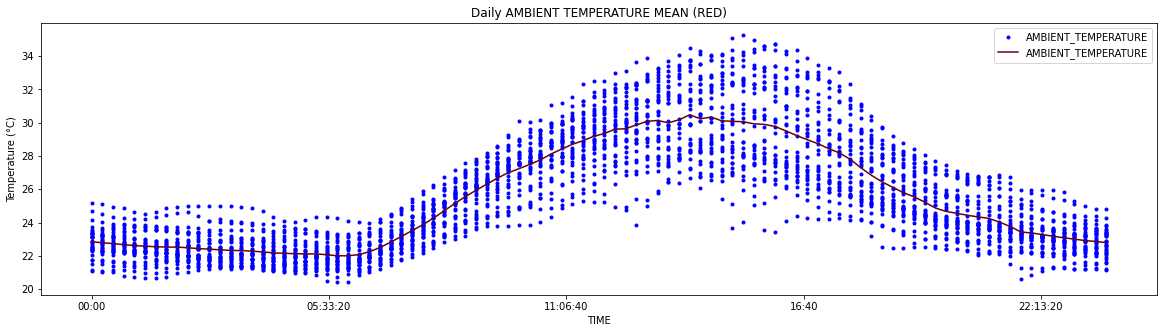

In [82]:
weather_data01.plot(x='TIME', y = 'AMBIENT_TEMPERATURE' , style='b.', figsize=(20,5))
weather_data01.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily AMBIENT TEMPERATURE MEAN (RED)')
plt.ylabel('Temperature (°C)')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Temperature (°C)')

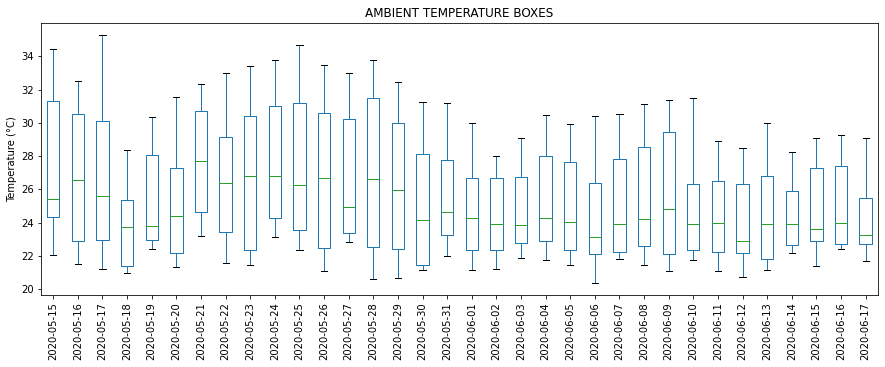

In [83]:
ambient_temp01 = weather_data01.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')
ambient_temp01.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('AMBIENT TEMPERATURE BOXES')
plt.ylabel('Temperature (°C)')

####Plant 01 Module Temperature Analysis

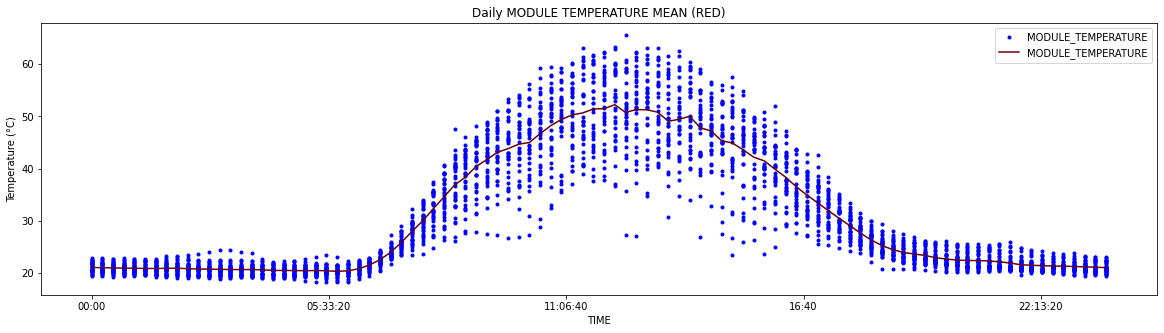

In [84]:
weather_data01.plot(x='TIME', y = 'MODULE_TEMPERATURE' , style='b.', figsize=(20,5))
weather_data01.groupby('TIME')['MODULE_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily MODULE TEMPERATURE MEAN (RED)')
plt.ylabel('Temperature (°C)')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Temperature (°C)')

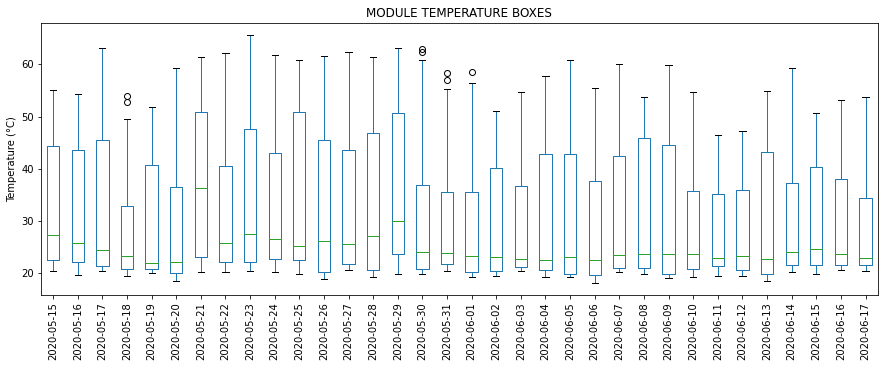

In [85]:
module_temp01 = weather_data01.pivot_table(values='MODULE_TEMPERATURE', index='TIME', columns='DATE')
module_temp01.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('MODULE TEMPERATURE BOXES')
plt.ylabel('Temperature (°C)')

####Plant 01 Irradiation Data Analysis

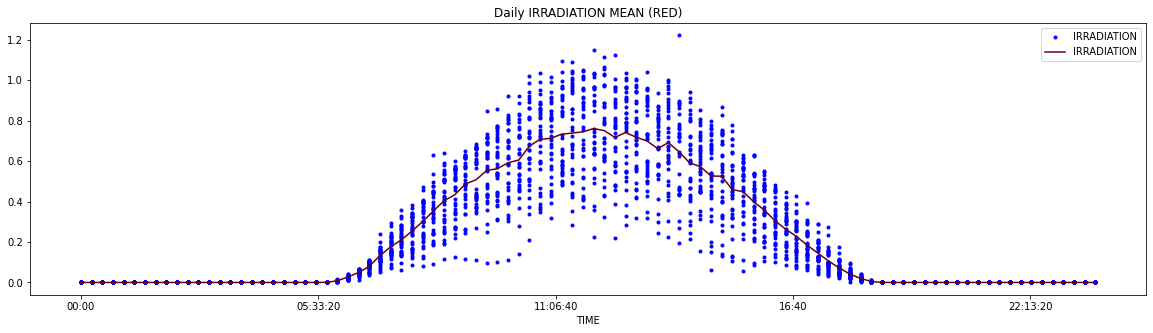

In [87]:
weather_data01.plot(x='TIME', y = 'IRRADIATION' , style='b.', figsize=(20,5))
weather_data01.groupby('TIME')['IRRADIATION'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily IRRADIATION MEAN (RED)')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'MODULE IRRADIATION BOXES')

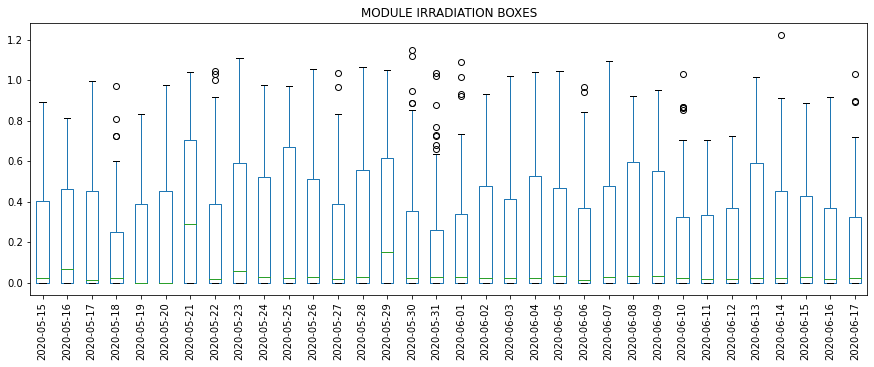

In [88]:
irradiation01 = weather_data01.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')
irradiation01.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('MODULE IRRADIATION BOXES')

###Solar Plant 02 Generation Data

####Explore Dataset

In [22]:
solargen_data02.shape

(67698, 7)

In [21]:
solargen_data02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
solargen_data02.describe(include='all').transpose()

count unique  ...         75%          max
DATE_TIME    67698   3259  ...         NaN          NaN
PLANT_ID     67698    NaN  ...   4.136e+06    4.136e+06
SOURCE_KEY   67698     22  ...         NaN          NaN
DC_POWER     67698    NaN  ...     446.592      1420.93
AC_POWER     67698    NaN  ...     438.215      1385.42
DAILY_YIELD  67698    NaN  ...        5534         9873
TOTAL_YIELD  67698    NaN  ...  1.3485e+09  2.24792e+09

[7 rows x 11 columns]

####Checking for Null Records

In [23]:
solargen_data02.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

####Dropping Unnecessary Columns

In [90]:
solargen_data02.drop(labels='PLANT_ID', axis=1, inplace=True)

####Formatting Data Time

In [91]:
#Formatting DateTime
solargen_data02['DATE_TIME'] = pd.to_datetime(solargen_data02['DATE_TIME'])
solargen_data02.sample(5)

DATE_TIME       SOURCE_KEY  ...  DAILY_YIELD   TOTAL_YIELD
2796  2020-05-16 08:00:00  9kRcWv60rDACzjR  ...   425.666667  2.247729e+09
32968 2020-06-01 12:45:00  NgDl19wMapZy17u  ...  3588.000000  1.116483e+08
23750 2020-05-27 19:45:00  LYwnQax7tkwH5Cb  ...  4296.000000  1.795021e+09
33171 2020-06-01 15:00:00  WcxssY2VbP4hApt  ...  4094.800000  1.818343e+08
8143  2020-05-18 20:45:00  Et9kgGMDl729KT4  ...  2320.000000  1.721810e+06

[5 rows x 6 columns]

In [92]:
solargen_data02['DATE'] = solargen_data02['DATE_TIME'].apply(lambda x:x.date())
solargen_data02['TIME'] = solargen_data02['DATE_TIME'].apply(lambda x:x.time())

solargen_data02.sample(5)

DATE_TIME       SOURCE_KEY  ...        DATE      TIME
16036 2020-05-23 08:30:00  oZ35aAeoifZaQzV  ...  2020-05-23  08:30:00
52197 2020-06-10 15:45:00  PeE6FRyGXUgsRhN  ...  2020-06-10  15:45:00
30538 2020-05-31 09:00:00  xMbIugepa2P7lBB  ...  2020-05-31  09:00:00
64659 2020-06-16 13:15:00  vOuJvMaM2sgwLmb  ...  2020-06-16  13:15:00
8472  2020-05-19 00:30:00  9kRcWv60rDACzjR  ...  2020-05-19  00:30:00

[5 rows x 8 columns]

####Replacing Source Key with Simple ID

In [93]:
solar02_inverter_id = solargen_data02['SOURCE_KEY'].unique()
solargen_data02['SOURCE_KEY'] = solargen_data02['SOURCE_KEY'].apply(lambda x :  int(np.where(solar02_inverter_id == x)[0]))

In [30]:
solargen_data02.sample(5)

DATE_TIME  SOURCE_KEY  ...        DATE      TIME
21360 2020-05-26 10:30:00          10  ...  2020-05-26  10:30:00
43015 2020-06-06 07:30:00           1  ...  2020-06-06  07:30:00
63267 2020-06-15 21:30:00          13  ...  2020-06-15  21:30:00
43517 2020-06-06 13:00:00          19  ...  2020-06-06  13:00:00
42270 2020-06-05 23:00:00           4  ...  2020-06-05  23:00:00

[5 rows x 8 columns]

####Plant 02 DC Power Analysis

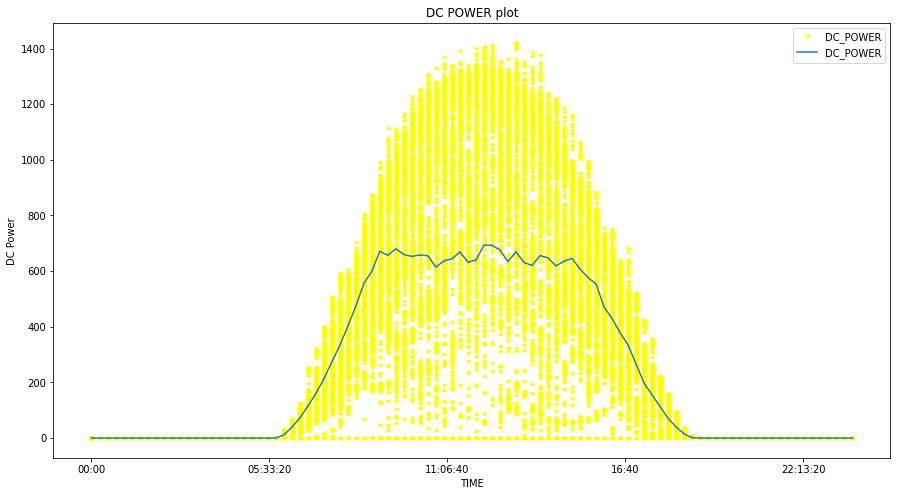

In [95]:
solargen_data02.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8), color='yellow')
solargen_data02.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True)
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

####Plant 02 AC Power Analysis

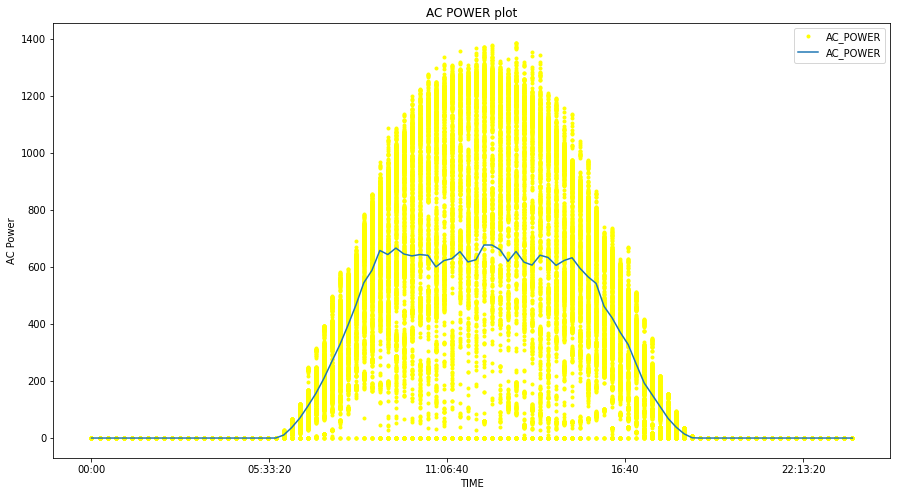

In [96]:
solargen_data02.plot(x= 'TIME', y='AC_POWER', style='.', figsize = (15, 8), color='yellow')
solargen_data02.groupby('TIME')['AC_POWER'].agg('mean').plot(legend=True)
plt.ylabel('AC Power')
plt.title('AC POWER plot')
plt.show()

####Observations

Plant 01 Inverters Produces Power from 5:30 to 18:30 since the sunlights is availablle only during that time period



####Daily Yeild Variation

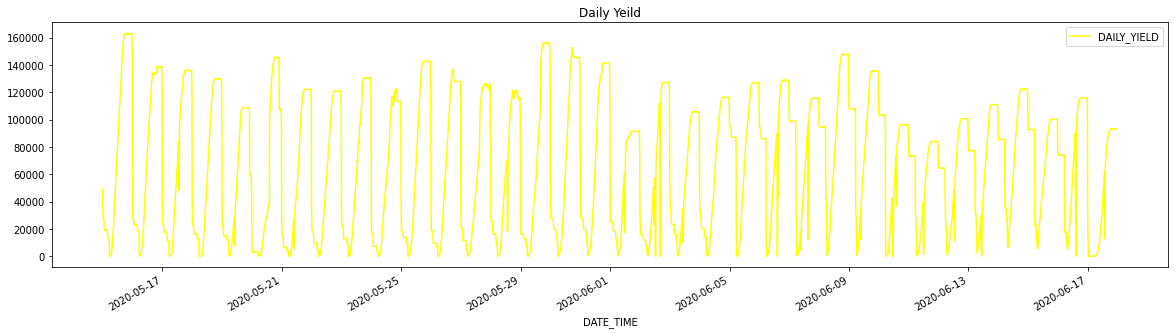

In [98]:
solargen_data02_eval=solargen_data02.groupby('DATE_TIME').sum().reset_index()

# daily yield plot
solargen_data02_eval.plot(x='DATE_TIME',y='DAILY_YIELD', title = 'Daily Yeild', figsize = (20,5), color='yellow')

plt.show()

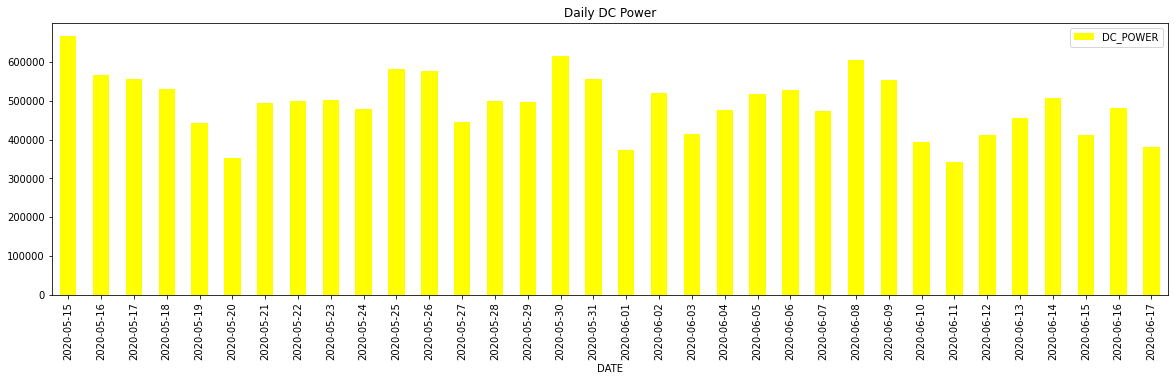

In [99]:
daily_solar02_gen = solargen_data02.groupby('DATE')['DC_POWER'].agg('sum')
daily_solar02_gen.plot.bar(figsize=(20,5), legend=True, color='yellow')
plt.title('Daily DC Power')
plt.show()

####Evaluation of Daily Power Generations

In [101]:
solargen_data02_calandar = solargen_data02.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

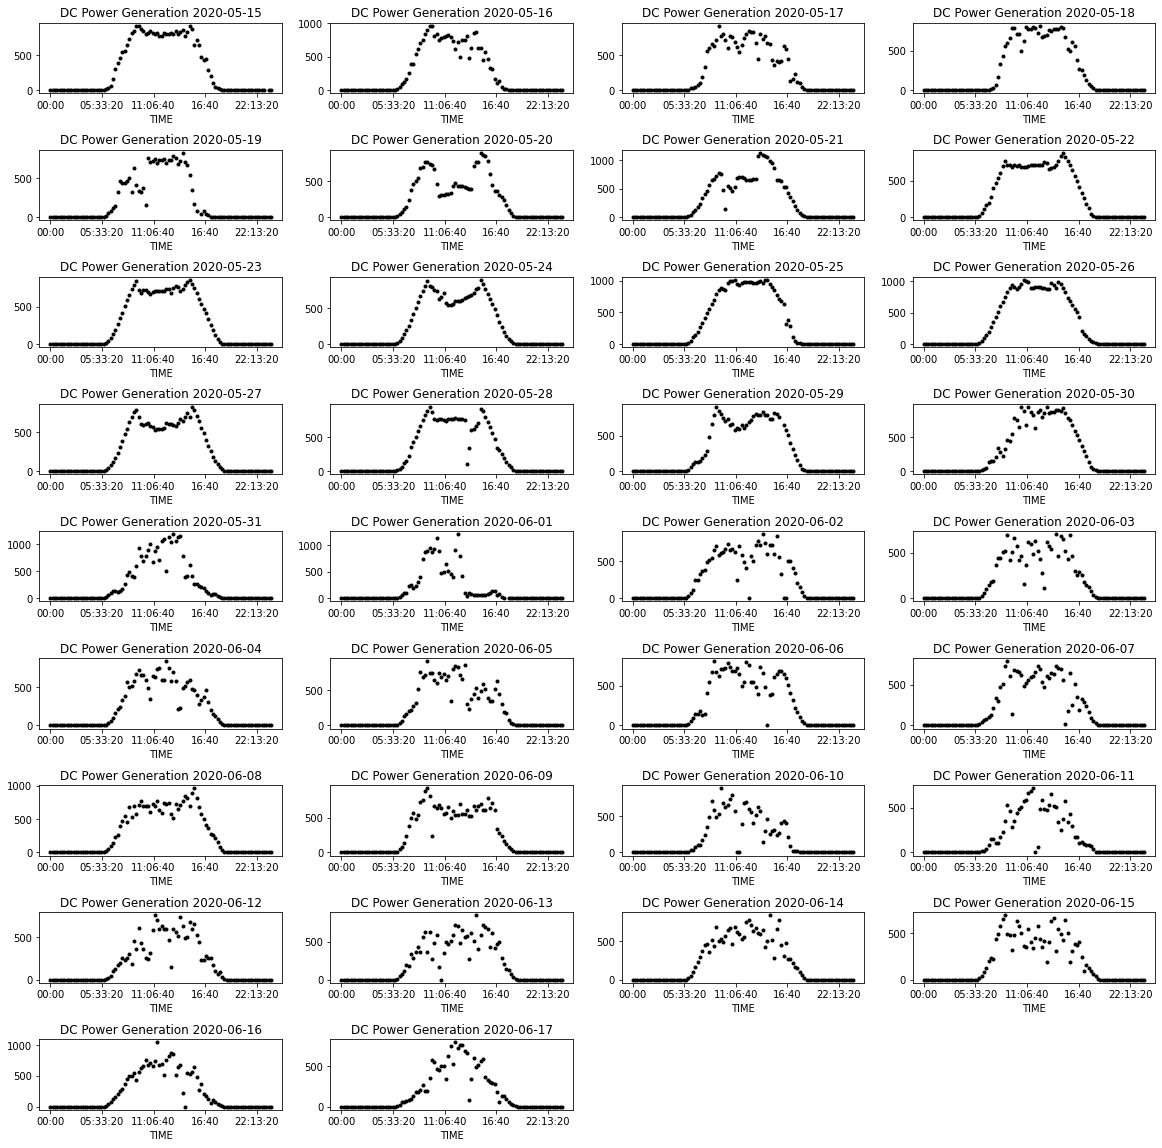

In [102]:
cols = solargen_data02_calandar.columns 
gp = plt.figure(figsize=(20,20)) 
    
gp.subplots_adjust(wspace=0.2, hspace=0.8)
for i in range(1, len(cols)+1):
  ax = gp.add_subplot(9,4, i)
  solargen_data02_calandar[cols[i-1]].plot(ax=ax, style = 'k.')
  ax.set_title('{} {}'.format('DC Power Generation', cols[i-1]))

####Observation

All the curves show a simmilar variation despite some fluctuations between 11AM to 2 PM


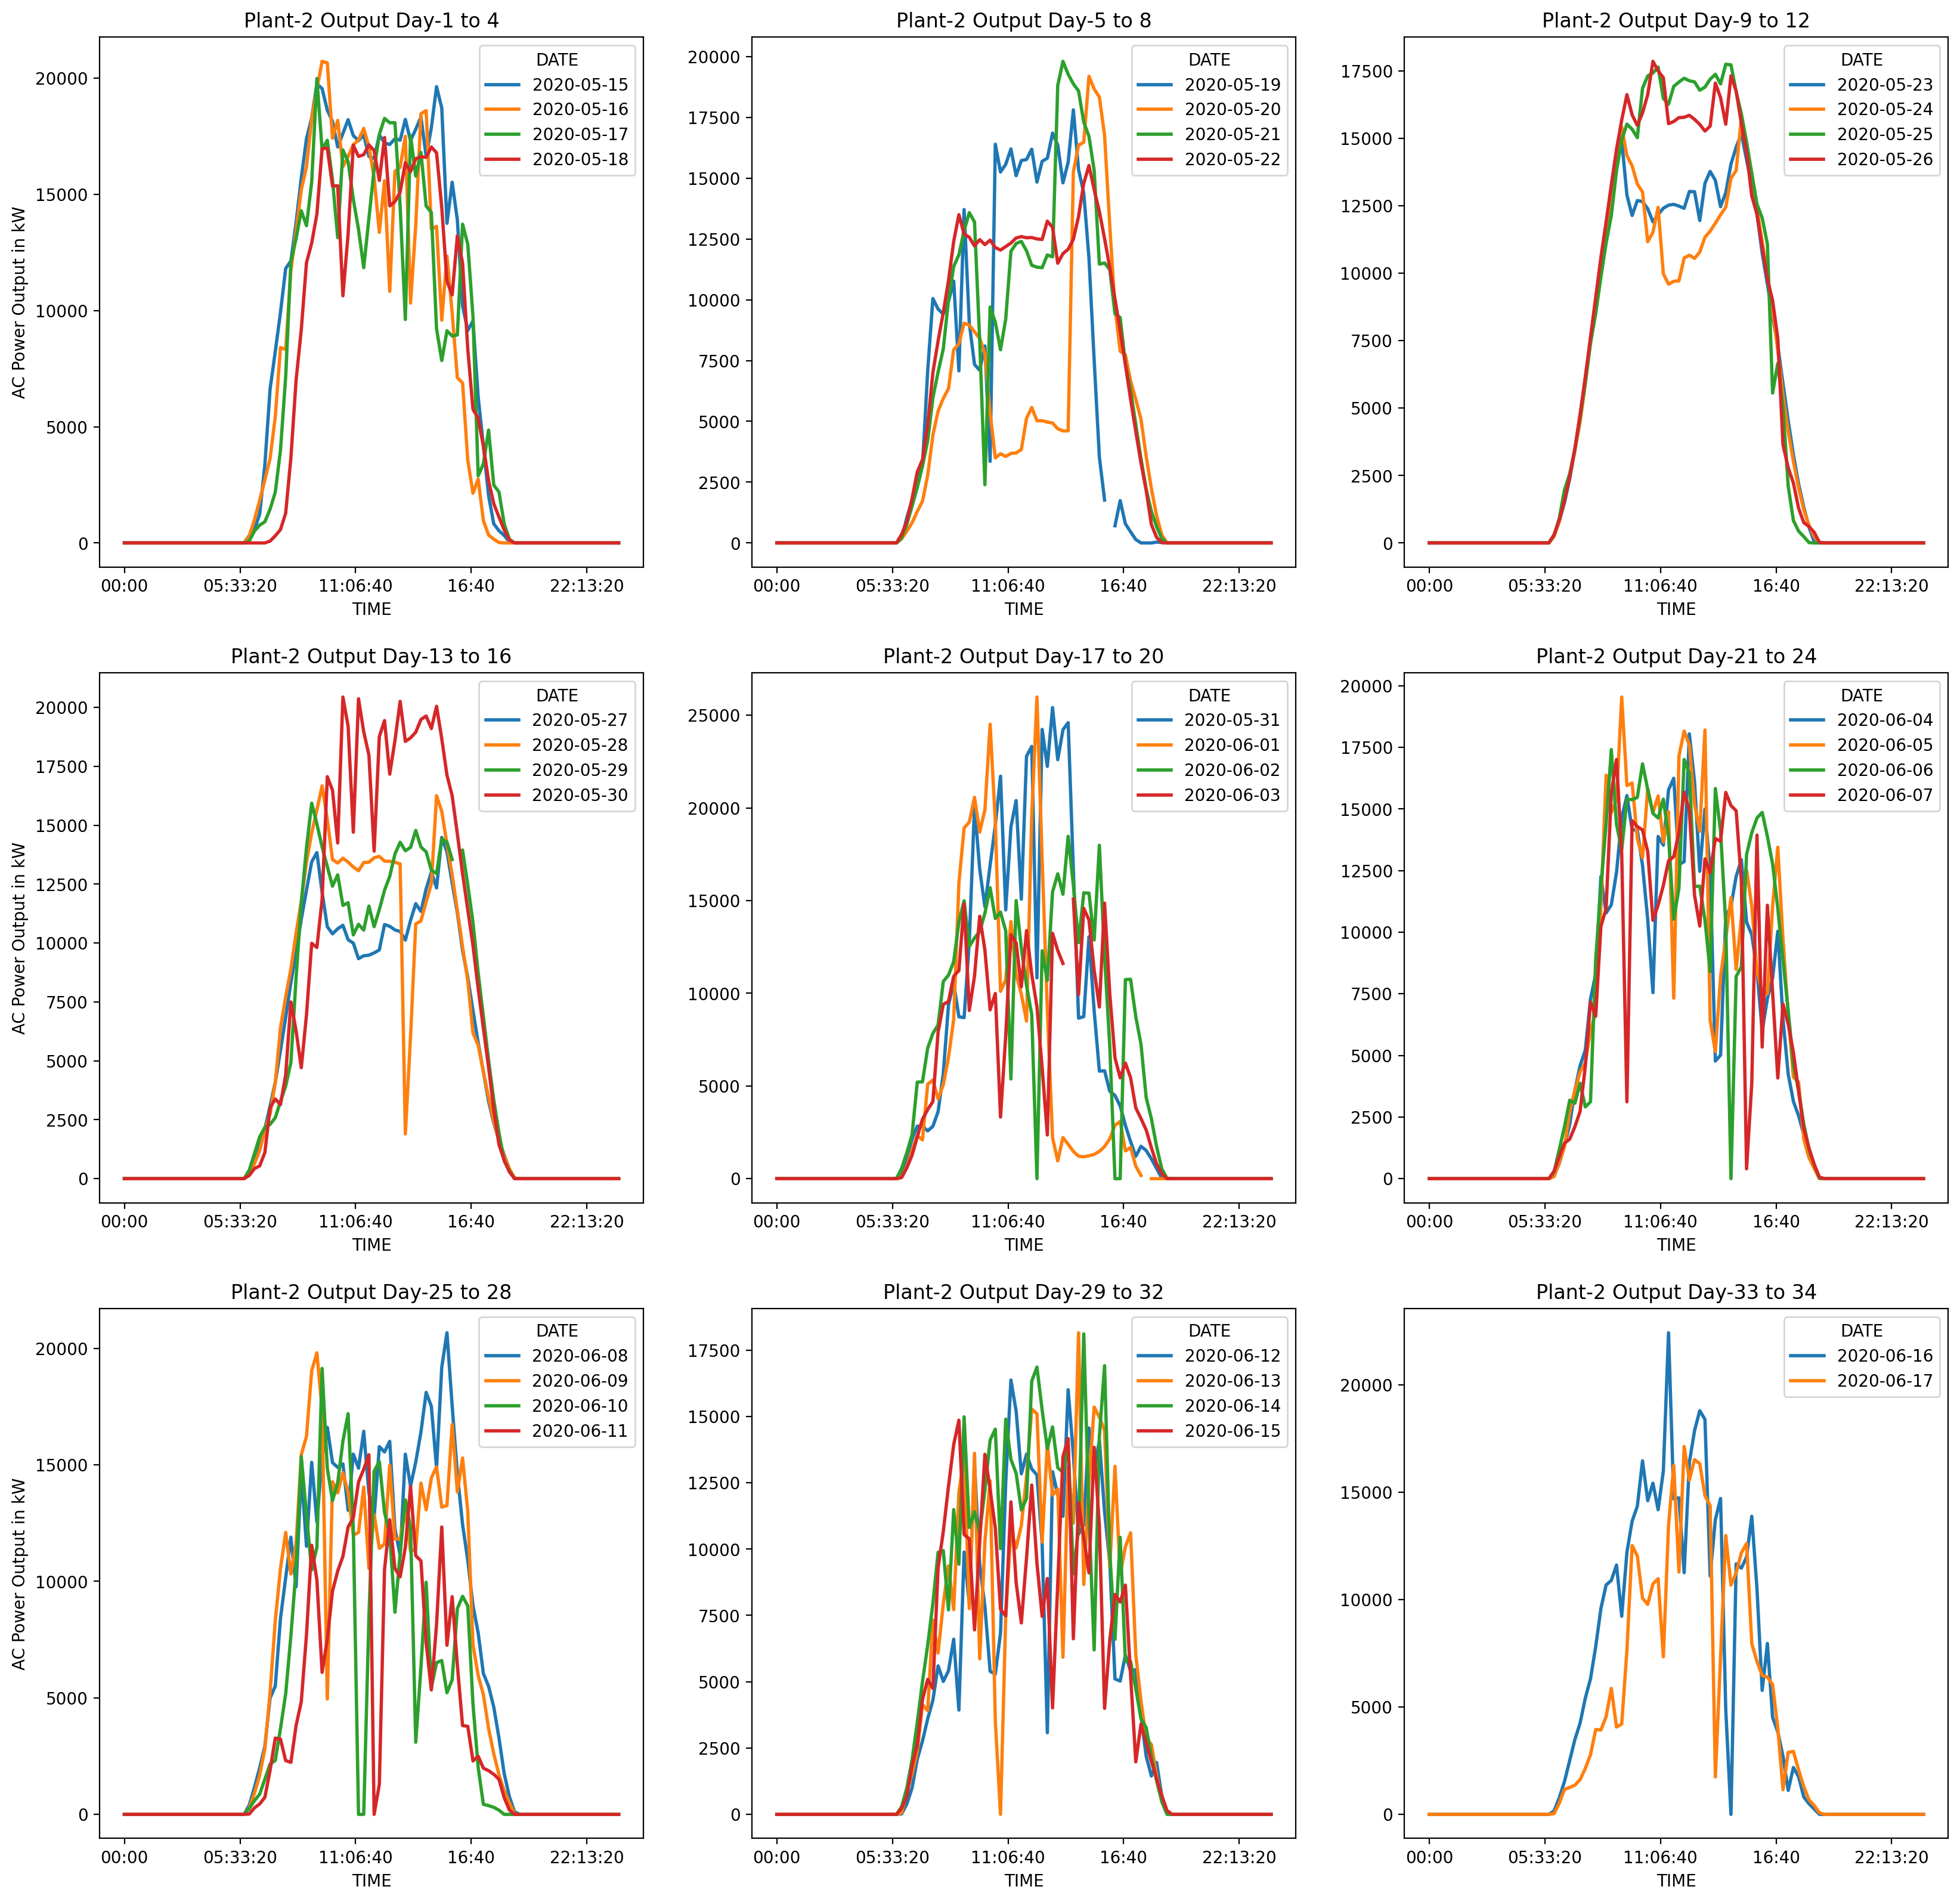

In [116]:
solargen_data02_ac_pwr = solargen_data02.copy()
solargen_data02_ac_pwr = solargen_data02_ac_pwr.groupby(['TIME','DATE'])['AC_POWER'].sum().unstack()

fig,ax=plt.subplots(ncols=3,nrows=3,dpi=200,figsize=(20,20))
ax[0,0].set_title('Plant-2 Output Day-1 to 4')
ax[0,1].set_title('Plant-2 Output Day-5 to 8')
ax[0,2].set_title('Plant-2 Output Day-9 to 12')
ax[1,0].set_title('Plant-2 Output Day-13 to 16')
ax[1,1].set_title('Plant-2 Output Day-17 to 20')
ax[1,2].set_title('Plant-2 Output Day-21 to 24')
ax[2,0].set_title('Plant-2 Output Day-25 to 28')
ax[2,1].set_title('Plant-2 Output Day-29 to 32')
ax[2,2].set_title('Plant-2 Output Day-33 to 34')

ax[0,0].set_ylabel('AC Power Output in kW')
ax[1,0].set_ylabel('AC Power Output in kW')
ax[2,0].set_ylabel('AC Power Output in kW')
    
solargen_data02_ac_pwr.iloc[:,0:4].plot(ax=ax[0,0], linewidth = 2)
solargen_data02_ac_pwr.iloc[:,4:8].plot(ax=ax[0,1], linewidth = 2)
solargen_data02_ac_pwr.iloc[:,8:12].plot(ax=ax[0,2], linewidth = 2)
solargen_data02_ac_pwr.iloc[:,12:16].plot(ax=ax[1,0], linewidth = 2)
solargen_data02_ac_pwr.iloc[:,16:20].plot(ax=ax[1,1], linewidth = 2)
solargen_data02_ac_pwr.iloc[:,20:24].plot(ax=ax[1,2], linewidth = 2)
solargen_data02_ac_pwr.iloc[:,24:28].plot(ax=ax[2,0], linewidth = 2)
solargen_data02_ac_pwr.iloc[:,28:32].plot(ax=ax[2,1], linewidth = 2)
solargen_data02_ac_pwr.iloc[:,32:].plot(ax=ax[2,2], linewidth = 2)

###Solar Plant 02 Weather Data

####Explore Datatset

In [31]:
weather_data02.shape

(3259, 6)

In [32]:
weather_data02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [33]:
weather_data02.describe(include='all').transpose()

count unique  ...        75%        max
DATE_TIME            3259   3259  ...        NaN        NaN
PLANT_ID             3259    NaN  ...  4.136e+06  4.136e+06
SOURCE_KEY           3259      1  ...        NaN        NaN
AMBIENT_TEMPERATURE  3259    NaN  ...    31.0568    39.1816
MODULE_TEMPERATURE   3259    NaN  ...    40.4807     66.636
IRRADIATION          3259    NaN  ...   0.438717    1.09877

[6 rows x 11 columns]

####Checking for Null Records

In [34]:
weather_data02.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

####Dropping Unnecessary Columns

In [103]:
weather_data02.drop(labels='PLANT_ID', axis=1, inplace=True)

####Formatting Data Time

In [104]:
#Formatting DateTime
weather_data02['DATE_TIME'] = pd.to_datetime(weather_data02['DATE_TIME'])
weather_data02.sample(5)

DATE_TIME       SOURCE_KEY  ...  MODULE_TEMPERATURE  IRRADIATION
604  2020-05-21 07:30:00  iq8k7ZNt4Mwm3w0  ...           30.215056     0.280466
1291 2020-05-28 11:15:00  iq8k7ZNt4Mwm3w0  ...           55.239916     0.929539
1215 2020-05-27 16:15:00  iq8k7ZNt4Mwm3w0  ...           46.678712     0.383356
764  2020-05-22 23:30:00  iq8k7ZNt4Mwm3w0  ...           25.531736     0.000000
1896 2020-06-03 19:15:00  iq8k7ZNt4Mwm3w0  ...           24.413450     0.000000

[5 rows x 5 columns]

In [105]:
weather_data02['DATE'] = weather_data02['DATE_TIME'].apply(lambda x:x.date())
weather_data02['TIME'] = weather_data02['DATE_TIME'].apply(lambda x:x.time())

weather_data02.sample(5)

DATE_TIME       SOURCE_KEY  ...        DATE      TIME
2826 2020-06-13 11:45:00  iq8k7ZNt4Mwm3w0  ...  2020-06-13  11:45:00
2106 2020-06-05 23:45:00  iq8k7ZNt4Mwm3w0  ...  2020-06-05  23:45:00
2044 2020-06-05 08:15:00  iq8k7ZNt4Mwm3w0  ...  2020-06-05  08:15:00
1257 2020-05-28 02:45:00  iq8k7ZNt4Mwm3w0  ...  2020-05-28  02:45:00
1514 2020-05-30 19:15:00  iq8k7ZNt4Mwm3w0  ...  2020-05-30  19:15:00

[5 rows x 7 columns]

####Plant 01 Ambient Temperature Analysis

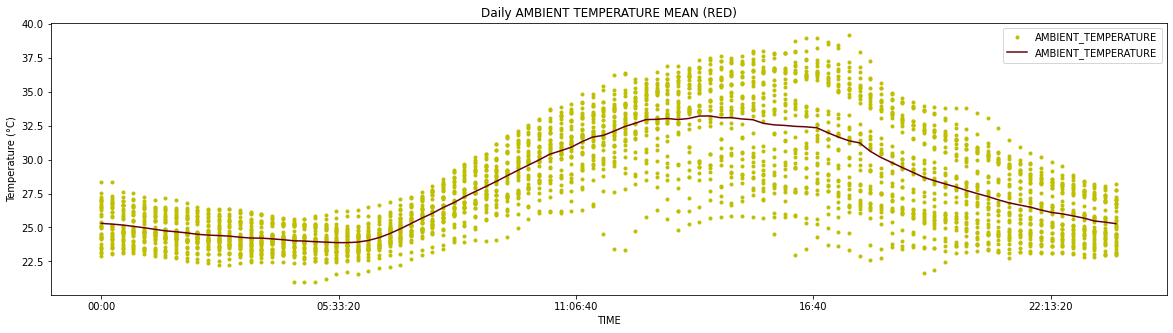

In [108]:
weather_data02.plot(x='TIME', y = 'AMBIENT_TEMPERATURE' , style='y.', figsize=(20,5))
weather_data02.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily AMBIENT TEMPERATURE MEAN (RED)')
plt.ylabel('Temperature (°C)')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Temperature (°C)')

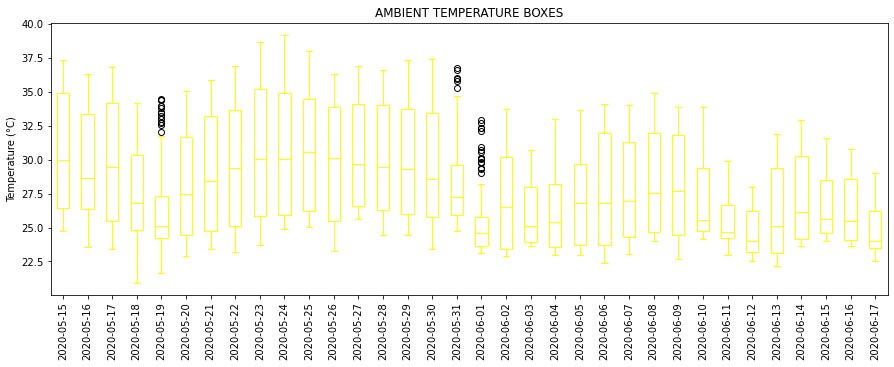

In [109]:
ambient_temp02 = weather_data02.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')
ambient_temp02.boxplot(figsize=(15,5), grid=False, rot=90, color='yellow')
plt.title('AMBIENT TEMPERATURE BOXES')
plt.ylabel('Temperature (°C)')

####Plant 02 Module Temperature Analysis

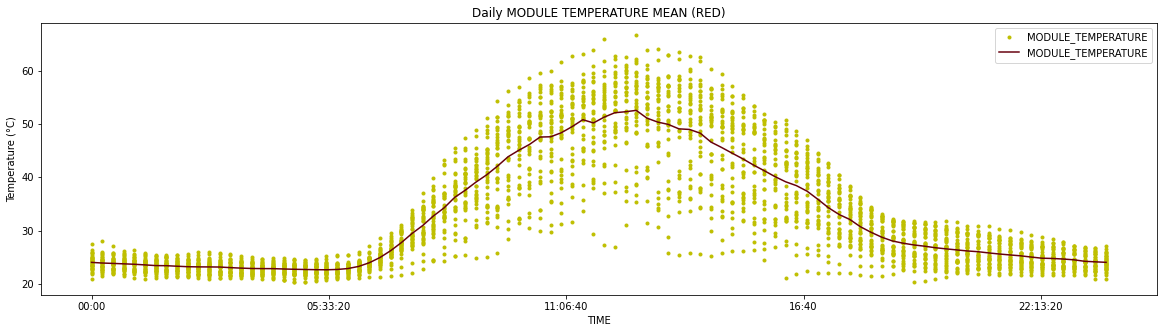

In [110]:
weather_data02.plot(x='TIME', y = 'MODULE_TEMPERATURE' , style='y.', figsize=(20,5))
weather_data02.groupby('TIME')['MODULE_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily MODULE TEMPERATURE MEAN (RED)')
plt.ylabel('Temperature (°C)')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Temperature (°C)')

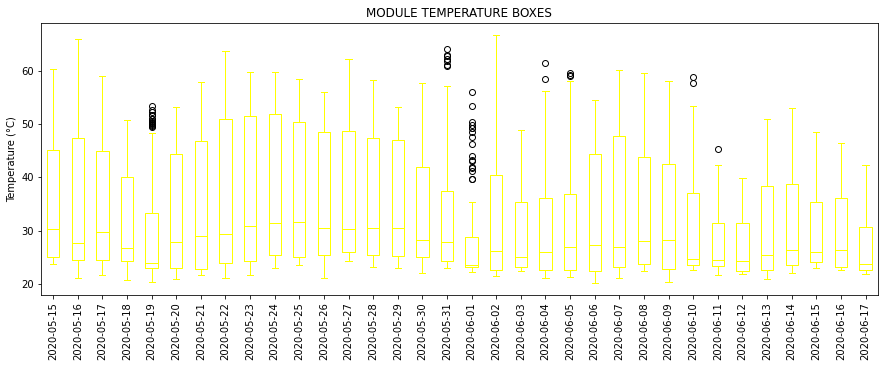

In [111]:
module_temp02 = weather_data02.pivot_table(values='MODULE_TEMPERATURE', index='TIME', columns='DATE')
module_temp02.boxplot(figsize=(15,5), grid=False, rot=90, color='yellow')
plt.title('MODULE TEMPERATURE BOXES')
plt.ylabel('Temperature (°C)')

####Plant 02 Irradiation Data Analysis

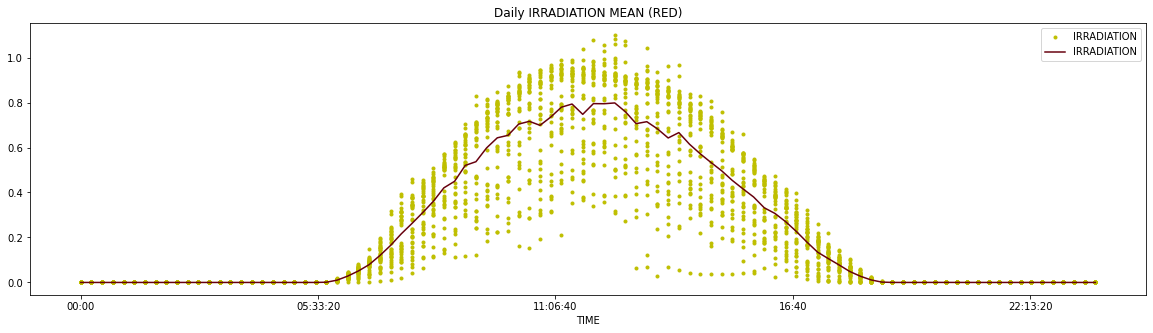

In [112]:
weather_data02.plot(x='TIME', y = 'IRRADIATION' , style='y.', figsize=(20,5))
weather_data02.groupby('TIME')['IRRADIATION'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily IRRADIATION MEAN (RED)')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'MODULE IRRADIATION BOXES')

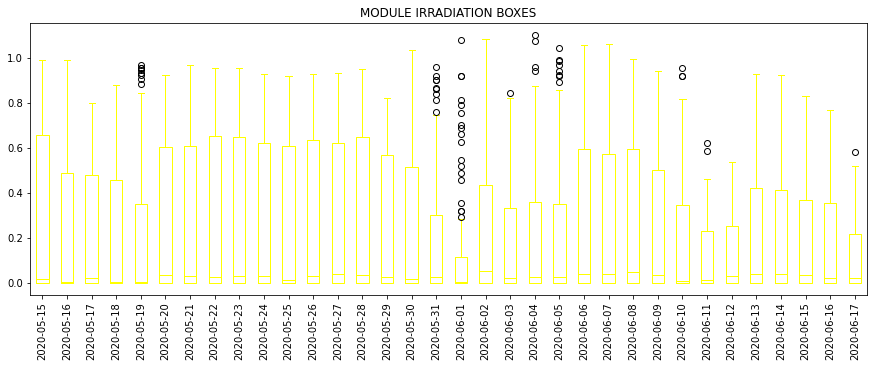

In [113]:
irradiation02 = weather_data02.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')
irradiation02.boxplot(figsize=(15,5), grid=False, rot=90, color = 'yellow')
plt.title('MODULE IRRADIATION BOXES')

##Data Set Building for Correlation Identification

Targetting Plant 01

In [ ]:
####Solar Generation Data

In [117]:
solargen_data01_DT = solargen_data01.groupby(['DATE_TIME'],as_index=False).sum()
solargen_data01_DT

DATE_TIME  SOURCE_KEY  ...    DAILY_YIELD  TOTAL_YIELD
0    2020-05-15 00:00:00         210  ...       0.000000  143581676.0
1    2020-05-15 00:15:00         210  ...       0.000000  143581676.0
2    2020-05-15 00:30:00         210  ...       0.000000  143581676.0
3    2020-05-15 00:45:00         210  ...       0.000000  143581676.0
4    2020-05-15 01:00:00         231  ...       0.000000  150761642.0
...                  ...         ...  ...            ...          ...
3153 2020-06-17 22:45:00         231  ...  129571.000000  156142755.0
3154 2020-06-17 23:00:00         231  ...  129571.000000  156142755.0
3155 2020-06-17 23:15:00         231  ...  129571.000000  156142755.0
3156 2020-06-17 23:30:00         231  ...  129571.000000  156142755.0
3157 2020-06-17 23:45:00         231  ...  127962.767857  156142755.0

[3158 rows x 6 columns]

####Dropping Unneccessary Columns

In [ ]:
solargen_data01_DT.drop(labels='SOURCE_KEY', axis=1, inplace=True)
solargen_data01_DT.drop(labels='TOTAL_YIELD', axis=1, inplace=True)

In [121]:
solargen_data01_DT.sample(5)

DATE_TIME       DC_POWER      AC_POWER    DAILY_YIELD
236  2020-05-17 13:45:00  186896.553571  18266.875000  118395.124999
858  2020-05-24 16:30:00   76882.857144   7539.710714  166298.500000
2316 2020-06-09 05:00:00       0.000000      0.000000       0.000000
2718 2020-06-13 09:30:00  177820.232142  17396.035715   32267.160716
2508 2020-06-11 05:00:00       0.000000      0.000000       0.000000

####Weather Data

In [124]:
weather_data01_DT = weather_data01.copy()
weather_data01_DT

DATE_TIME       SOURCE_KEY  ...        DATE      TIME
0    2020-05-15 00:00:00  HmiyD2TTLFNqkNe  ...  2020-05-15  00:00:00
1    2020-05-15 00:15:00  HmiyD2TTLFNqkNe  ...  2020-05-15  00:15:00
2    2020-05-15 00:30:00  HmiyD2TTLFNqkNe  ...  2020-05-15  00:30:00
3    2020-05-15 00:45:00  HmiyD2TTLFNqkNe  ...  2020-05-15  00:45:00
4    2020-05-15 01:00:00  HmiyD2TTLFNqkNe  ...  2020-05-15  01:00:00
...                  ...              ...  ...         ...       ...
3177 2020-06-17 22:45:00  HmiyD2TTLFNqkNe  ...  2020-06-17  22:45:00
3178 2020-06-17 23:00:00  HmiyD2TTLFNqkNe  ...  2020-06-17  23:00:00
3179 2020-06-17 23:15:00  HmiyD2TTLFNqkNe  ...  2020-06-17  23:15:00
3180 2020-06-17 23:30:00  HmiyD2TTLFNqkNe  ...  2020-06-17  23:30:00
3181 2020-06-17 23:45:00  HmiyD2TTLFNqkNe  ...  2020-06-17  23:45:00

[3182 rows x 7 columns]

####Dropping Unneccessary Columns

In [125]:
weather_data01_DT.drop(labels='SOURCE_KEY', axis=1, inplace=True)

###Merging Two Data Sets for Plant 01

In [126]:
plant01_merged_data = pd.merge(solargen_data01_DT, weather_data01_DT, how='inner', on='DATE_TIME')

In [127]:
plant01_merged_data.sample(10)

DATE_TIME       DC_POWER  ...        DATE      TIME
1087 2020-05-27 02:00:00       0.000000  ...  2020-05-27  02:00:00
1472 2020-05-31 10:00:00  140409.892856  ...  2020-05-31  10:00:00
2434 2020-06-10 10:45:00  129342.750000  ...  2020-06-10  10:45:00
796  2020-05-24 01:00:00       0.000000  ...  2020-05-24  01:00:00
1659 2020-06-02 08:45:00  162367.642857  ...  2020-06-02  08:45:00
1462 2020-05-31 07:30:00   43598.107143  ...  2020-05-31  07:30:00
140  2020-05-16 13:45:00  155359.857143  ...  2020-05-16  13:45:00
867  2020-05-24 18:45:00       0.000000  ...  2020-05-24  18:45:00
2334 2020-06-09 09:45:00  212101.303580  ...  2020-06-09  09:45:00
1844 2020-06-04 07:15:00   55111.785715  ...  2020-06-04  07:15:00

[10 rows x 9 columns]

In [128]:
plant01_merged_data.isnull().sum()

DATE_TIME              0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
dtype: int64

###Graphical Analysis for Correleation Identification

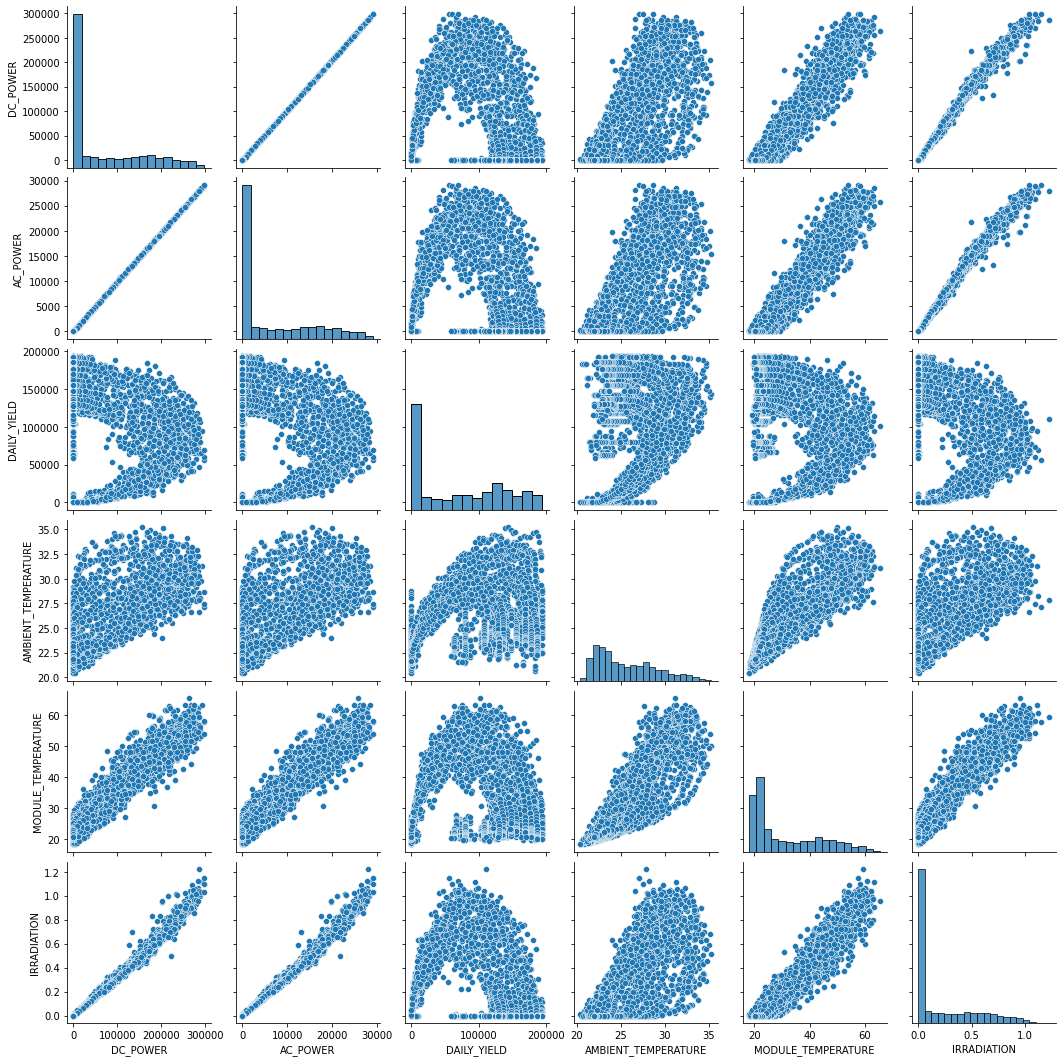

In [129]:
sns.pairplot(plant01_merged_data[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']])

####Insights from Graphical Analysis

* DC_POWER and AC_POWER are perfactly linearly related.
* DC_Power and AC_Power generated has a direct relationship with Irradiation.
* Generally Module temperature increases with the increase in Ambient temperature and Irradiation.


####Graphical Analysis of Power Generation agaist Time


Text(0, 0.5, 'DC POWER')

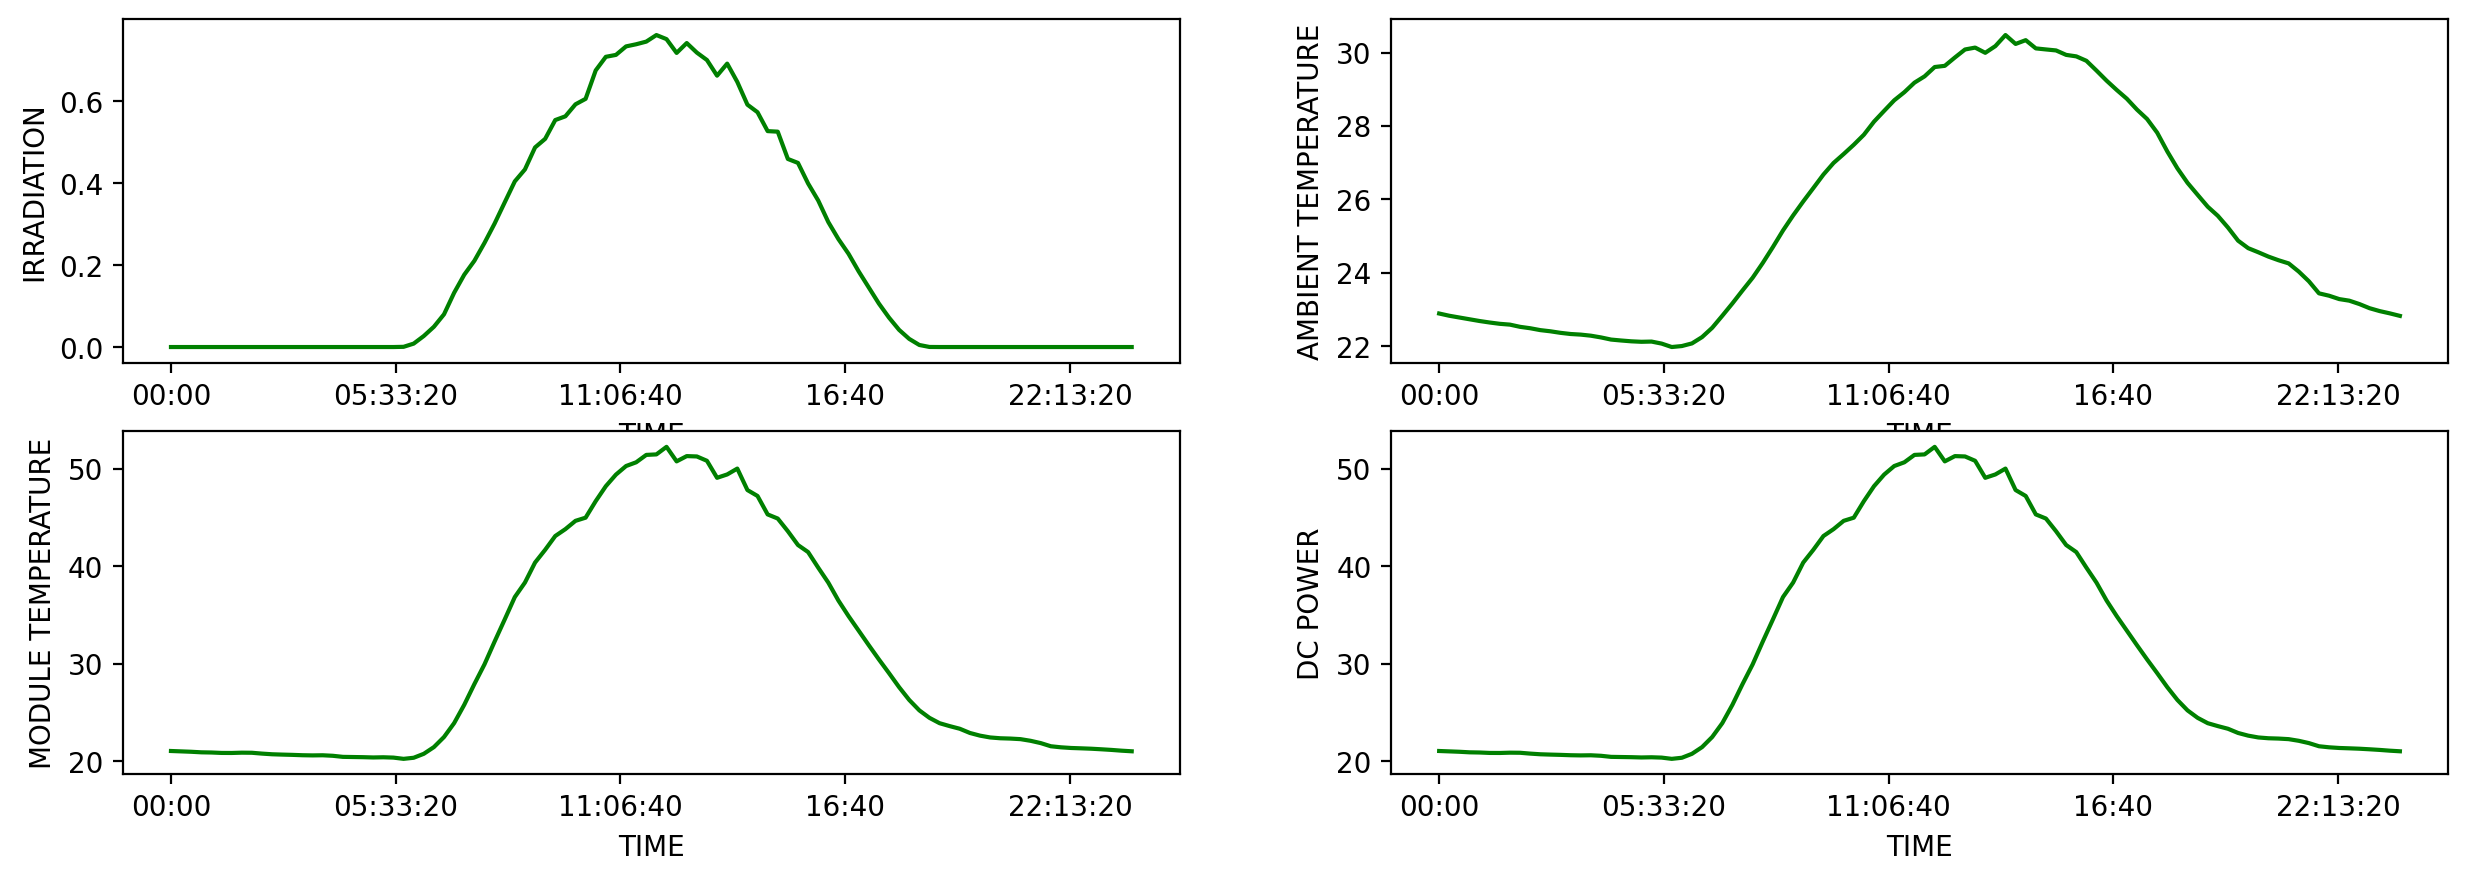

In [130]:
plant01_merged_data_t =plant01_merged_data.groupby(['TIME']).mean()

f,ax = plt.subplots(ncols=2,nrows=2,dpi=200,figsize=(15,5))

plant01_merged_data_t['IRRADIATION'].plot(ax=ax[0,0], color = 'green')
plant01_merged_data_t['AMBIENT_TEMPERATURE'].plot(ax=ax[0,1], color = 'green')
plant01_merged_data_t['MODULE_TEMPERATURE'].plot(ax=ax[1,0], color = 'green')
plant01_merged_data_t['MODULE_TEMPERATURE'].plot(ax=ax[1,1], color = 'green')

ax[0,0].set_ylabel('IRRADIATION')
ax[0,1].set_ylabel('AMBIENT TEMPERATURE')
ax[1,0].set_ylabel('MODULE TEMPERATURE')
ax[1,1].set_ylabel('DC POWER')

####Insights from the Graphical Analysis
Average Irradiation, Ambient Temperature, Module Temperature and DC Power first increases and then decreases from sunrise to sunset.


###Correlation Identification from Graphical Analysis
* DC_Power & AC_Power are directly correlated
* DC_Power is postively correlated with Irradation, Module Temperature & Ambient Temperature.

###Correlation Matrix

In [131]:
orrelation_matrix_plant01 = plant01_merged_data[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']].corr()

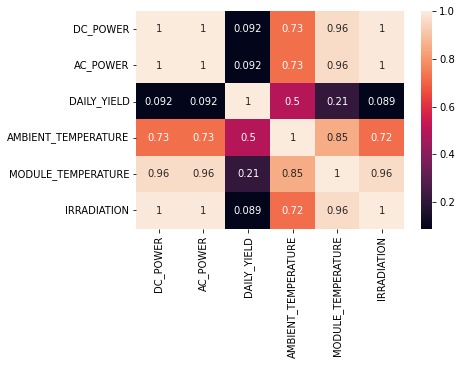

In [132]:
sns.heatmap(orrelation_matrix_plant01, annot=True)

##Solar Power Prediction & Forecast

The Objective of the model is to predict and forecast the solar power generation for the next few days.

As per the analysis it is evident that AC Power output will mainly depend on the Solar Irradiation, Ambient Temperature and Module Temperature.

Eventhough, time series forcast can be used to predict the solar generation, due to the unrealiability of the weather, prediction will be more accurate if its based on the weather forecast data.

###Prediction of AC_Power Using Liner Regression
AC Power Generation is mainly dependent on Solar Irradiation, Ambient Temperature and Module Temperature.

However, since the AC Power prediction will be done based on weather forecast, Module Temperature Parameter will not be available.

Hence, Prediction Model will be developed with Solar Irradiation & Ambient Temperature

In [133]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [134]:
X = plant01_merged_data[['IRRADIATION','AMBIENT_TEMPERATURE']]
X.head()

IRRADIATION  AMBIENT_TEMPERATURE
0          0.0            25.184316
1          0.0            25.084589
2          0.0            24.935753
3          0.0            24.846130
4          0.0            24.621525

In [135]:
y = plant01_merged_data['AC_POWER']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [137]:
print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 2525
Test sample size  = 632


###Creating Linear Regression Model

In [138]:
model = linear_model.LinearRegression()

####Fitting Model

In [139]:
model.fit(X_train, y_train)

LinearRegression()

####Prediction from Model

In [140]:
pred_y = model.predict(X_test)

####Visualizing Prediction

Text(0.5, 1.0, 'Solar Power Generation Prediction')

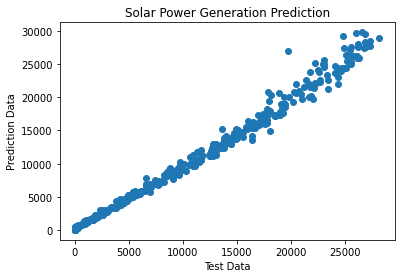

In [141]:
plt.scatter(y_test, pred_y)
plt.xlabel('Test Data')
plt.ylabel('Prediction Data')
plt.title('Solar Power Generation Prediction')

##Model Evaluation

In [142]:
from sklearn.metrics import r2_score, mean_squared_error

In [148]:
d = {'Test Data': y_test, 'Predicted Data': pred_y, 'Difference': y_test-pred_y, 'Difference %': (abs(y_test-pred_y)/y_test)*100}
df = pd.DataFrame(data=d)
df.sample(10)

Test Data  Predicted Data   Difference  Difference %
2512    318.075000      405.776768   -87.701768     27.572669
3102  14483.887500    13024.903174  1458.984326     10.073154
1218  20299.108929    20810.576090  -511.467161      2.519653
3131   2869.840000     2716.198578   153.641422      5.353658
133   19409.383929    19037.550758   371.833170      1.915739
2189      0.000000      155.190322  -155.190322           inf
1439      0.000000      150.973194  -150.973194           inf
520    3987.000000     4224.694285  -237.694285      5.961733
2485      0.000000      103.137491  -103.137491           inf
2666      0.000000      117.624187  -117.624187           inf

In [149]:
mse = mean_squared_error(y_test, pred_y)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, pred_y)
print("R2:", r2)


MSE: 578069.6881502356
RMSE: 760.3089425688978
R2: 0.9919610845837611


In [208]:
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)

Slope: [28106.56038056    42.67126527]
Intercept: -853.0856144148365


##Saving the Model

In [193]:
import joblib

save_file = 'model_solar_pred_v1.joblib'
joblib.dump(model, open(save_file, 'wb'))

In [194]:
model_ = joblib.load(save_file)
model_

LinearRegression()

In [195]:
sample_data_file = 'https://raw.githubusercontent.com/pasindu-94/solar-power-prediction-multi-inverter/main/datasets/test_data_set_16_06_2020.csv'

sample_data_input = pd.read_csv(sample_data_file)
sample_data_input.head(10)

IRRADIATION  AMBIENT_TEMPERATURE
0          0.0            23.103046
1          0.0            22.853855
2          0.0            22.701282
3          0.0            22.620441
4          0.0            22.585765
5          0.0            22.654925
6          0.0            22.739895
7          0.0            22.727596
8          0.0            22.659652
9          0.0            22.609900

##Definition of Model Processing Function

In [206]:
def solar_predictor(input_data):
  prediction = model.predict(input_data)
  plt.plot(prediction)
  print(F"Total Yeild for the Given Period = {prediction.sum()}")


Total Yeild for the Given Period = 525555.0556176928


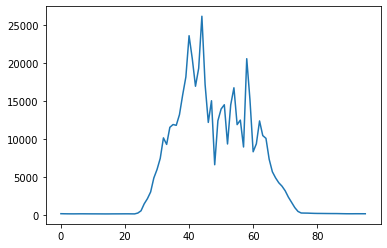

In [207]:
solar_predictor(sample_data_input)